<a href="https://colab.research.google.com/github/SLMath/Study_MachileLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/SLMath/Study_MachileLearning/main/Datasets/heart_failure.csv')
data.shape

(299, 13)

In [12]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


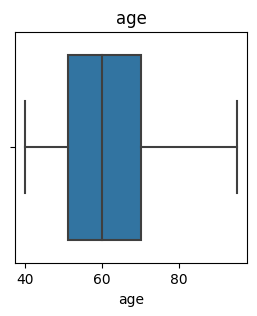

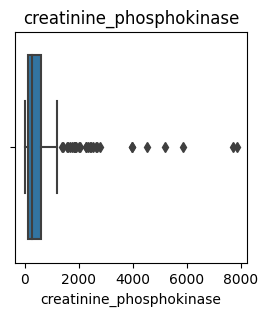

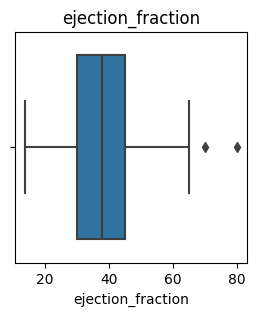

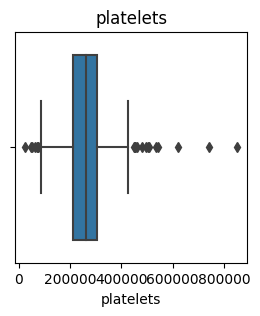

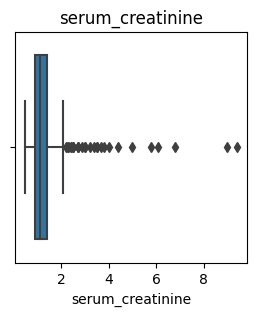

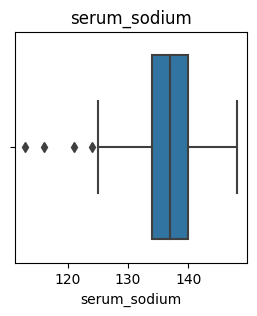

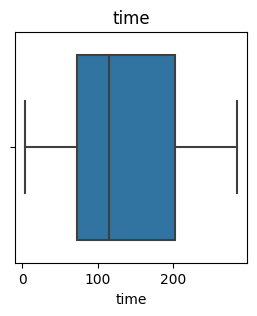

In [27]:
target = 'DEATH_EVENT'

for col in data:
    if len(data[col].unique()) > 2:
        plt.figure(figsize= (3, 3))
        sns.boxplot(data= data, x= col, hue= target)
        plt.title(col)
        plt.show()

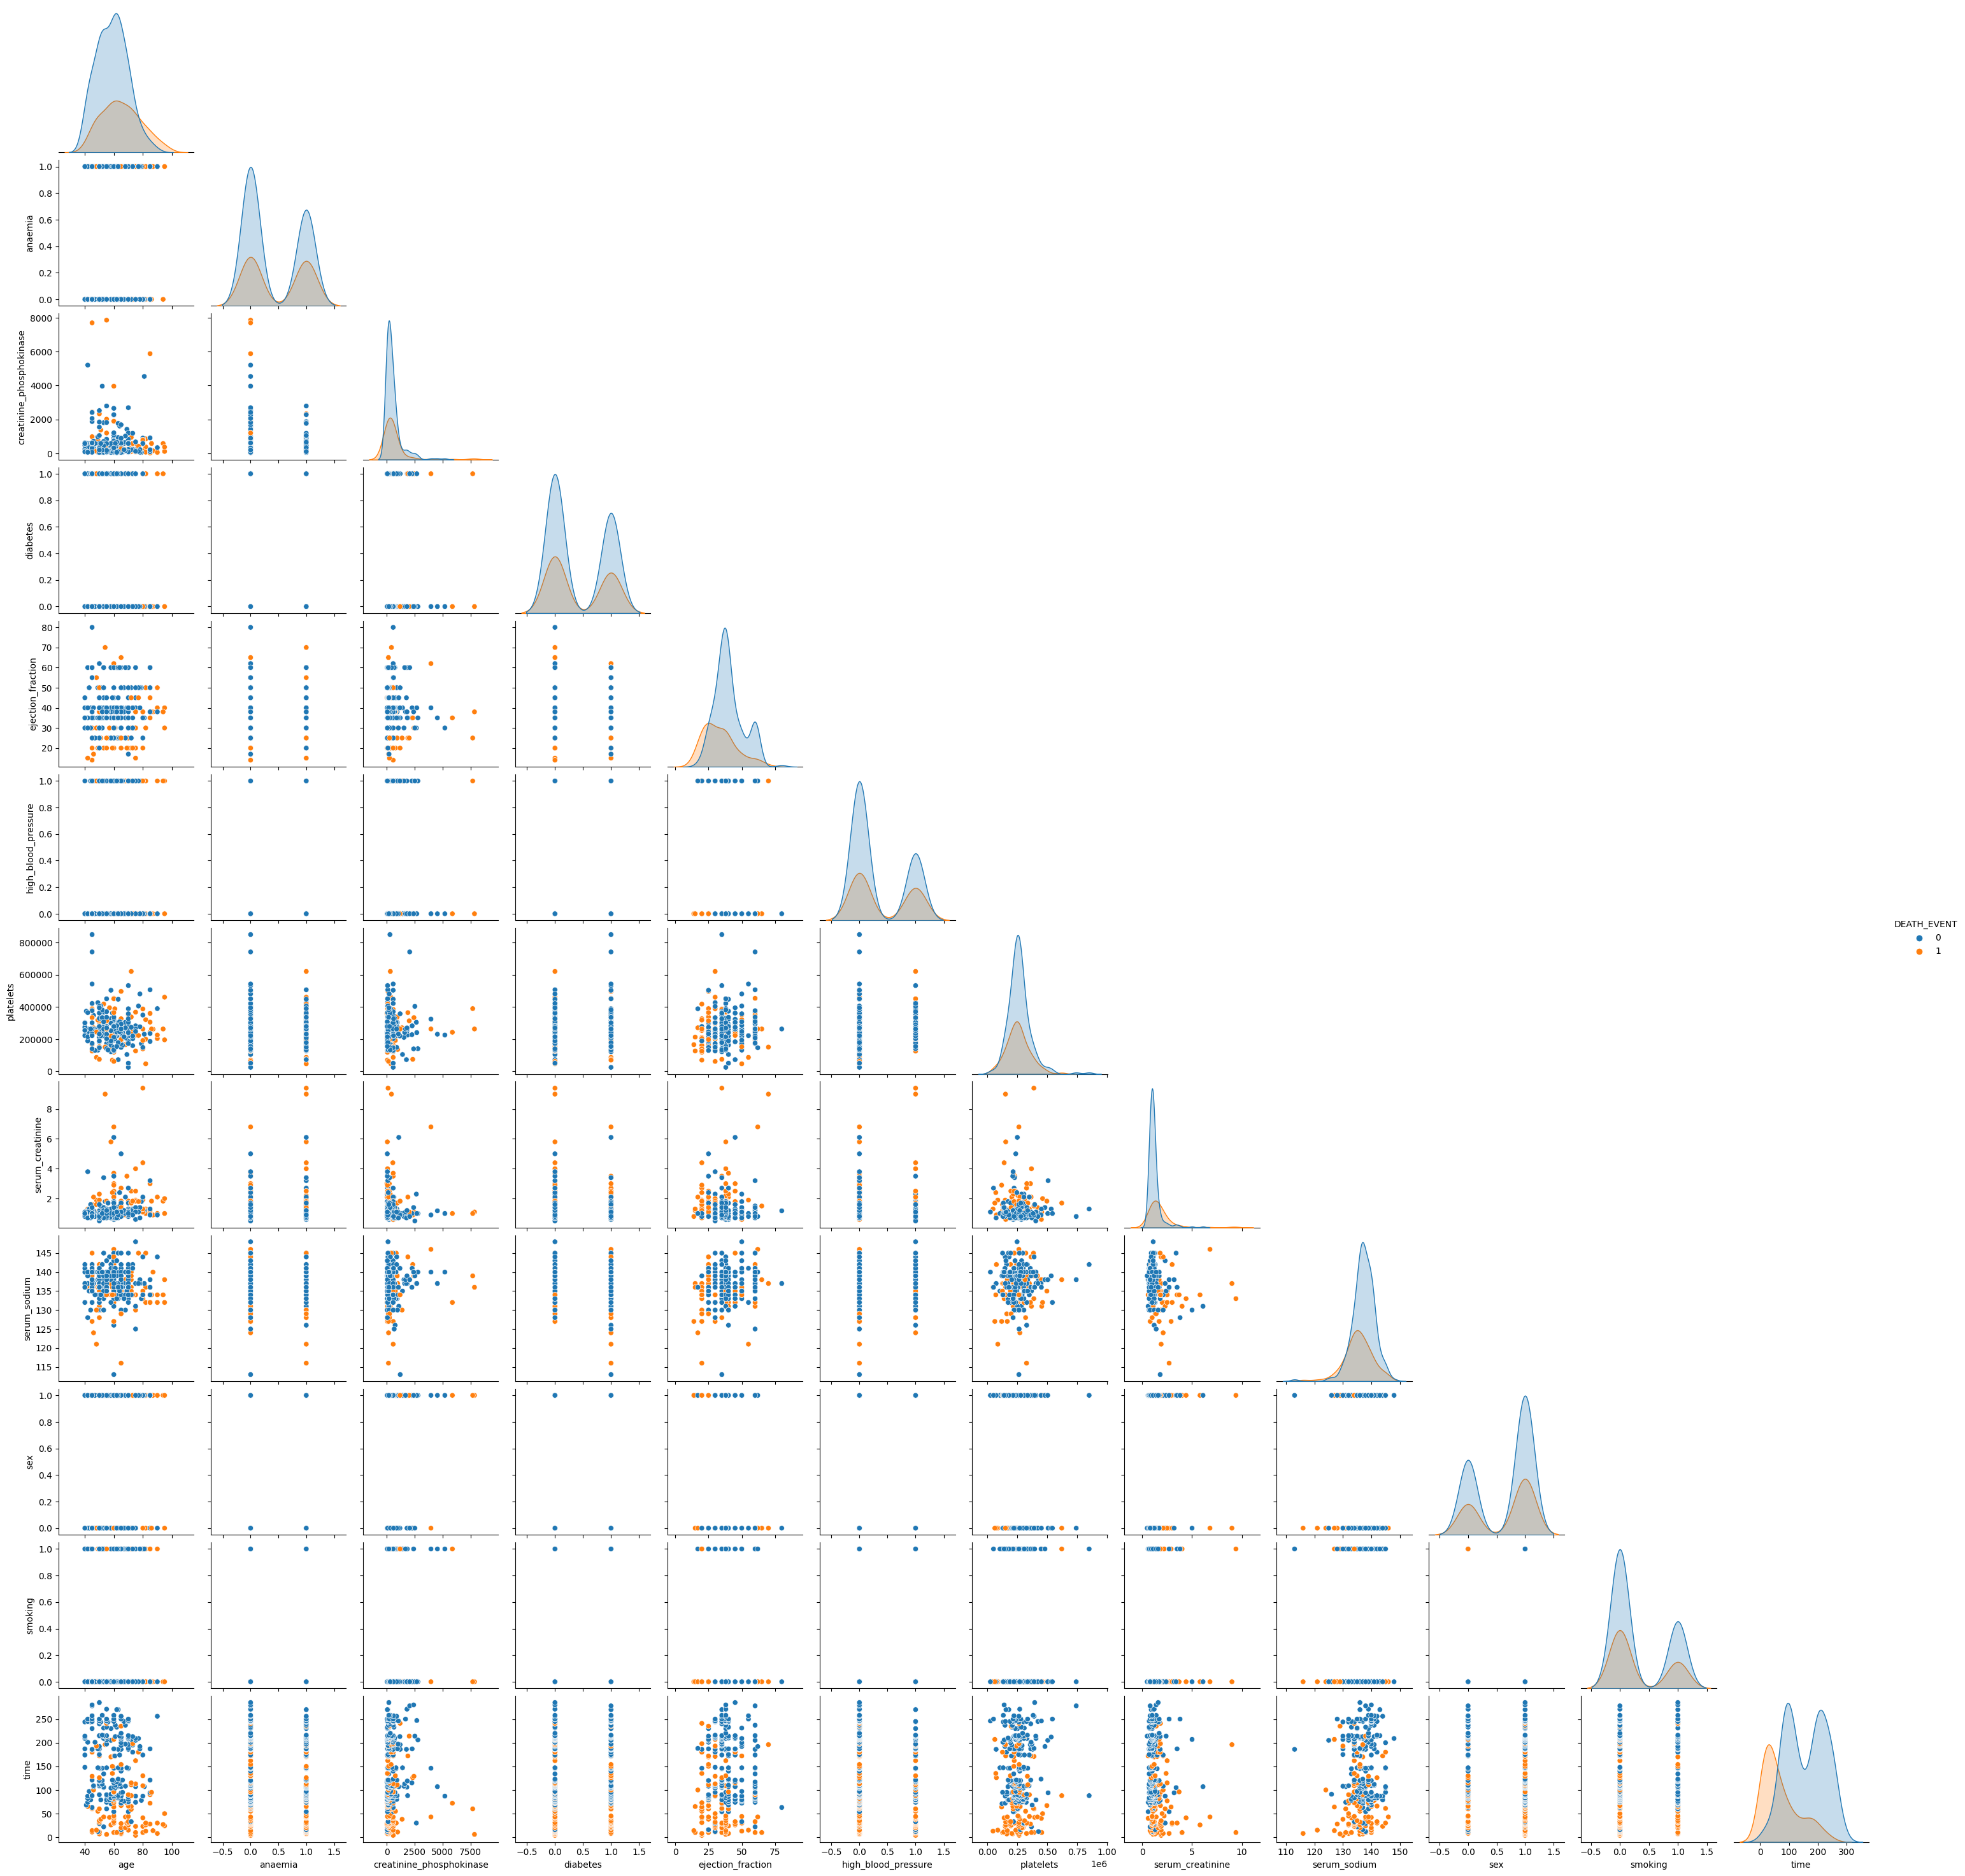

In [29]:
sns.pairplot(data, hue= target, corner= True)

<Axes: >

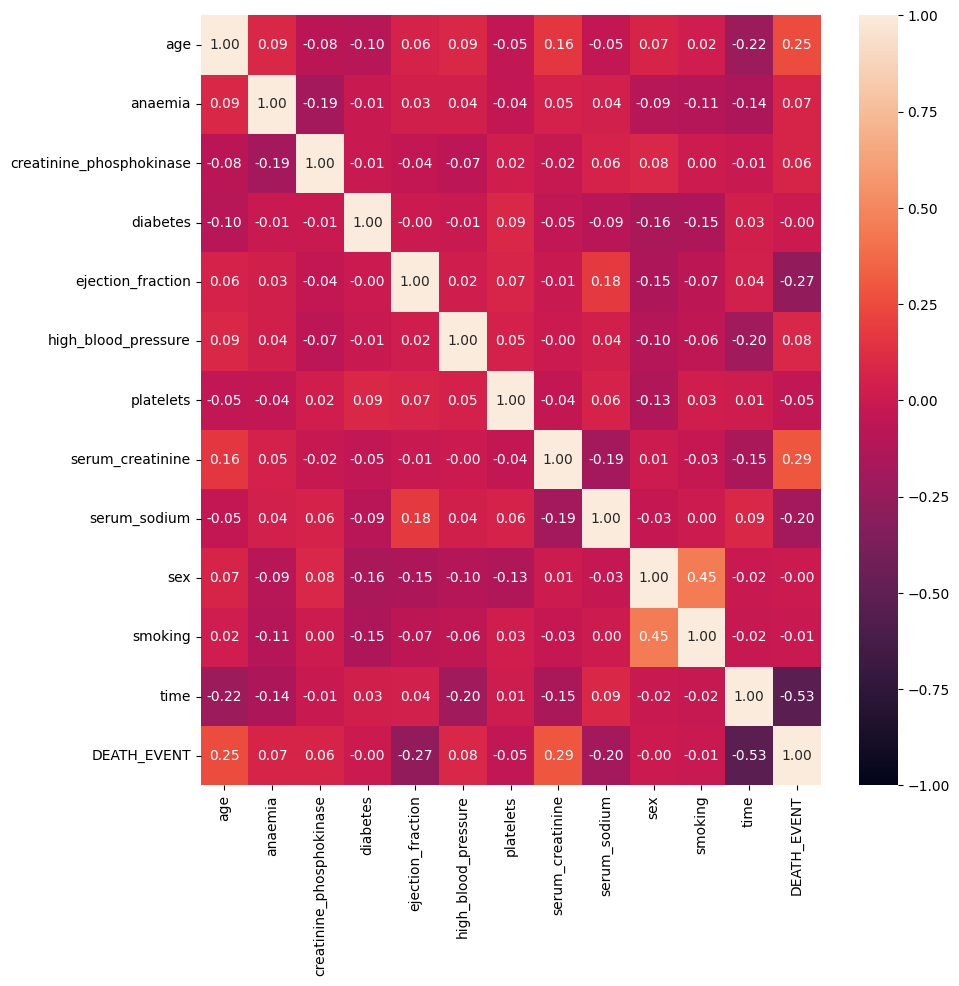

In [36]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), vmin= -1, vmax= 1, fmt= '.2f', annot= True)

Falta um dicionario de dados para entender melhor e talvez tratar dados.

# Modelos

In [39]:
y = data[target]
y.value_counts() / len(y)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

In [77]:
# Pensando que, ao predizer que ela pode morrer por ataquecardia,
# a pessoa possa se tratar e se monitorar, mas não envolve cirurgia ou
# algum procedimento envolvido, queremos diminuir as chances de falar
# que ela não vai morrer, quando ela tem alta chance de morrer. Isto
# seria um falso negativo, e para evitar esse tipo de erro (tipo II),
# devemos escolher um modelo que maximize o recall.
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns= target)

X_train, X_test, y_train, y_test = train_test_split( X, y,
	test_size= 0.2,
    random_state= 42,
	stratify= y # distribuir o target de modo iqualitario entre teste e treino
)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

y_train.sum() / len(y_train),\
y_test.sum() / len(y_test)

(0.32217573221757323, 0.31666666666666665)

In [91]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(y_pred, y_test= y_test):
    display(
        pd.DataFrame( confusion_matrix(y_test, y_pred) )\
            .rename_axis("predict")\
            [[1, 0]]\
            .rename(lambda num : f'real_{num}', axis='columns')
            .sort_index(ascending= False)
        )

def print_recall(y_pred, y_test= y_test):
    print(f'recall: {recall_score(y_test, y_pred):.1%}')

def print_results(y_pred, y_test= y_test):
    print_recall(y_pred, y_test)
    print_confusion_matrix(y_pred, y_test)

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print_results(y_pred_lr)

recall: 57.9%


,real_1,real_0
predict,,
1,11,8
0,3,38


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

ss_poly = StandardScaler()
poly = PolynomialFeatures(2)

X_train_poly = ss_poly.fit_transform( poly.fit_transform(X_train) )
X_test_poly = ss_poly.transform( poly.transform(X_test) )

lr_poly = LogisticRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_lr_poly = lr_poly.predict(X_test_poly)

print_results(y_pred_lr_poly)

recall: 42.1%


,real_1,real_0
predict,,
1,8,11
0,6,35


In [88]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(3, 11):
    neigh = KNeighborsClassifier(n_neighbors= n)
    neigh.fit(X_train, y_train)
    y_pred_neigh = neigh.predict(X_test)

    print("=" * 50)
    print("n =", n)
    print_results(y_pred_neigh)

n = 3
recall: 21.1%


,real_1,real_0
predict,,
1,4,15
0,2,39


n = 4
recall: 10.5%


,real_1,real_0
predict,,
1,2,17
0,0,41


n = 5
recall: 21.1%


,real_1,real_0
predict,,
1,4,15
0,3,38


n = 6
recall: 15.8%


,real_1,real_0
predict,,
1,3,16
0,0,41


n = 7
recall: 21.1%


,real_1,real_0
predict,,
1,4,15
0,0,41


n = 8
recall: 21.1%


,real_1,real_0
predict,,
1,4,15
0,0,41


n = 9
recall: 21.1%


,real_1,real_0
predict,,
1,4,15
0,1,40


n = 10
recall: 21.1%


,real_1,real_0
predict,,
1,4,15
0,1,40


In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print_results(y_pred_dt)

# it usually overfits in train data
print('=' * 50)
print('Train Metrics')
print_results(dt.predict(X_train), y_train)

recall: 57.9%


,real_1,real_0
predict,,
1,11,8
0,7,34


Train Metrics
recall: 100.0%


,real_1,real_0
predict,,
1,77,0
0,0,162


In [95]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print_results(y_pred_svc)

recall: 42.1%


,real_1,real_0
predict,,
1,8,11
0,3,38
